Hunter Bennett | Glass Lab | Brain Aging Project | 12 Feb 2021  

In [2]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat
from homer_preprocessing import read_annotated_peaks

In [3]:
dataDirectory = '/data/mm10/Brain_MPSIIIA/ChIP/H3K27AC/PU_1/WT/'
workingDirectory = '/home/h1bennet/brain_aging/results/00_Microglia_CompareATACNFR/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Annotate HisTrader peaks with H3K27Ac data

In [6]:
if not os.path.isdir('./annotated_peaks'):
    os.mkdir('./annotated_peaks')

In [4]:
drop_files = ['NaN']

# drop_files = ['']

In [73]:
# grab relevant tag directories

tagdirs = np.sort(glob.glob('/home/h1bennet/brain_aging/results/00_Microglia_H3K27Ac/merged_tagdirs/*all*'))

tagdirs = pd.Series(tagdirs)[~pd.Series(tagdirs).str.contains('|'.join(drop_files))].tolist()

In [156]:
with open('./annotatePeaks_homer.sh', 'w') as f:
    annotate_4month = ['annotatePeaks.pl', './differential_peaks/00_pu1_4month_act_histrader.nfr.txt',
                       'mm10', '-size 200', '-norm 1e7', '-d \\\n',
                       ' \\\n'.join(tagdirs), '>',
                       './annotated_peaks/00_pu1_4month_act_histrader_ann_norm.txt &\n\n']
    
    annotate_25month = ['annotatePeaks.pl', './differential_peaks/01_pu1_25month_act_histrader.nfr.txt',
                       'mm10', '-size 200', '-norm 1e7', '-d \\\n',
                       ' \\\n'.join(tagdirs), '>',
                       './annotated_peaks/01_pu1_25month_act_histrader_ann_norm.txt &\n\n']
    
    f.write(' '.join(annotate_4month))    
    f.write(' '.join(annotate_25month))
    
    f.close()

In [95]:
with open('./annotatePeaks_given.sh', 'w') as f:
    annotate_4month = ['annotatePeaks.pl', './differential_peaks/00_pu1_4month_act_histrader.nfr.txt',
                       'mm10', '-size given', '>',
                       './annotated_peaks/00_pu1_4month_act_histrader_reindex.txt &\n\n']
    
    annotate_25month = ['annotatePeaks.pl', './differential_peaks/01_pu1_25month_act_histrader.nfr.txt',
                       'mm10', '-size given', '>',
                       './annotated_peaks/01_pu1_25month_act_histrader_reindex.txt &\n\n']
    
    f.write(' '.join(annotate_4month))    
    f.write(' '.join(annotate_25month))
    
    f.close()

# Try a few different cutoffs of tag counts to see if there is a point that gives us a good false positive rate based on merge peaks overlap

In [208]:
tagThreshes = [1,2,4,8,16,32,64,128]

### run for 4 month samples

In [209]:
# import annotation file
df, mat = read_annotated_peaks('./annotated_peaks/00_pu1_4month_act_histrader_ann_norm.txt')

In [210]:
nfr = pd.read_csv('./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt', sep='\t',
                  index_col=0)

In [211]:
for thresh in tagThreshes:
    # select peaks passing threshold
    peakIDs = df.index[df['/home/h1bennet/brain_aging/results/00_Microglia_H3K27Ac/merged_tagdirs/00_all_microglia_H3K27Ac_4months'] > thresh].tolist()
    nfr.loc[peakIDs, :].to_csv('./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_'+str(thresh)+'_peak.txt',
                               sep='\t')

1
2
4
8
16
32
64
128


### run for 25 month samples

In [212]:
# import annotation file
df, mat = read_annotated_peaks('./annotated_peaks/01_pu1_25month_act_histrader_ann_norm.txt')

In [213]:
nfr = pd.read_csv('./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt', sep='\t',
                  index_col=0)

In [214]:
for thresh in tagThreshes:
    # select peaks passing threshold
    peakIDs = df.index[df['/home/h1bennet/brain_aging/results/00_Microglia_H3K27Ac/merged_tagdirs/01_all_microglia_H3K27Ac_25months'] > thresh].tolist()
    nfr.loc[peakIDs, :].to_csv('./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_'+str(thresh)+'_peak.txt',
                               sep='\t')

1
2
4
8
16
32
64
128


# 4 months

In [252]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_all \
./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt (2108 total) and ./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt (2108 total)
	Comparing ./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt (2108 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt (2108 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	67	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		1422	./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt
X	X	591	./annotated_peaks/00_pu1_4month_act_histrader_reindex.txt|./differential_peaks/00_pu1_

In [253]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_01 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (1918 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (1918 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (1918 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (1918 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	89	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		1259	./annot

In [254]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_02 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (1676 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (1676 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (1676 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (1676 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	121	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		1063	./anno

In [255]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_04 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1140 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1140 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1140 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1140 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	244	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		672	./annot

In [256]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_08 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (557 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (557 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (557 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (557 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	461	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		333	./annotated

In [257]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_16 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (198 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (198 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (198 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (198 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	597	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		124	./anno

In [258]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_32 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (50 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (50 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (50 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (50 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	651	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		33	./annotated

In [259]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_64 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (2 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (2 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (2 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (2 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	665	./differential_peaks/00_pu1_4month_idr_peaks.txt
X		1	./annotated_peak

In [260]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_4month_128 \
./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt \
./differential_peaks/00_pu1_4month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total)
	Comparing ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total)
	Comparing ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total) and ./differential_peaks/00_pu1_4month_idr_peaks.txt (666 total)

./annotated_peaks/00_microglia_H3K27Ac_4months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt	./differential_peaks/00_pu1_4month_idr_peaks.txt	Total	Name
	X	666	./differential_peaks/00_pu1_4month_idr_peaks.txt


In [284]:
total_atac_4months = 666
total_peaks_4month = [2108, 1918, 1676, 1140, 557, 198, 50, 2, 0]
overlap_4month = [591, 569, 537, 417, 203, 68, 15, 1, 0]
sensitivity_4month = [i / total_atac_4months for i in overlap_4month]
truepos_4month = []
for i, j in zip(overlap_4month, total_peaks_4month):
    truepos_4month.append(i/(i+j+1))

In [283]:
sensitivity_4month

[0.21888888888888888,
 0.22869774919614147,
 0.24254742547425473,
 0.26765083440308085,
 0.266754270696452,
 0.2546816479400749,
 0.22727272727272727,
 0.25,
 0.0]

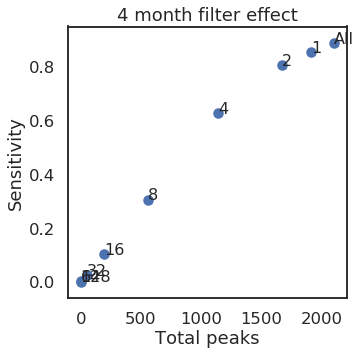

In [285]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(total_peaks_4month,
            tp_4months)


for i,j,txt in zip(total_peaks_4month, sensitivity_4month, ['All', '1', '2', '4', '8', '16', '32', '64', '128']):
    ax.text(x=i,
            y=j,
            s=txt,
            fontdict = {'fontsize':16})
    
ax.set_title('4 month filter effect');
ax.set_ylabel('Sensitivity');
ax.set_xlabel('Total peaks');

## 25 months

In [275]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_all \
./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt (4947 total) and ./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt (4947 total)
	Comparing ./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt (4947 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt (4947 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	214	./differential_peaks/01_pu1_25month_idr_peaks.txt
X		3346	./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt
X	X	1345	./annotated_peaks/01_pu1_25month_act_histrader_reindex.txt|./differe

In [263]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_01 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (4229 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (4229 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (4229 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt (4229 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_1_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	301	./differential_peaks/01_pu1_25month_idr_peaks.txt

In [264]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_02 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (3097 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (3097 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (3097 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt (3097 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_2_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	520	./differential_peaks/01_pu1_25month_idr_peaks.txt

In [265]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_04 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1461 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1461 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1461 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt (1461 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_4_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	994	./differential_peaks/01_pu1_25month_idr_peaks.txt

In [266]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_08 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (387 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (387 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (387 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt (387 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_8_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	1426	./differential_peaks/01_pu1_25month_idr_peaks.txt
X	

In [267]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_16 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (42 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (42 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (42 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt (42 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_16_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	1586	./differential_peaks/01_pu1_25month_idr_peaks.txt
X

In [268]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_32 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (0 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (0 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (0 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt (0 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_32_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	1601	./differential_peaks/01_pu1_25month_idr_peaks.txt


In [269]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_64 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (0 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (0 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (0 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt (0 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_64_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	1601	./differential_peaks/01_pu1_25month_idr_peaks.txt


In [270]:
%%bash

mergePeaks -prefix merge_peaks_output/histrader_25month_128 \
./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt \
./differential_peaks/01_pu1_25month_idr_peaks.txt

	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total)
	Comparing ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt (0 total)
	Comparing ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total) and ./differential_peaks/01_pu1_25month_idr_peaks.txt (1601 total)

./annotated_peaks/01_microglia_H3K27Ac_25months_HisTrader_NFR_H3K27Ac_thresh_128_peak.txt	./differential_peaks/01_pu1_25month_idr_peaks.txt	Total	Name
	X	1601	./differential_peaks/01_pu1_25month_idr_peaks.txt


In [291]:
total_atac_25months = 1601
total_peaks_25months = [4948, 4230, 3098, 1462, 388, 43, 0, 0, 0]
overlap_25months = [1346, 1265, 1056, 596, 172, 15, 0, 0, 0]
sensitivity_25months = [i / total_atac_25months for i in overlap_25months]

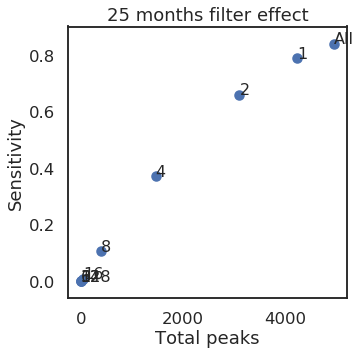

In [292]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(total_peaks_25months,
            sensitivity_25months)


for i,j,txt in zip(total_peaks_25months, sensitivity_25months, ['All', '1', '2', '4', '8', '16', '32', '64', '128']):
    ax.text(x=i,
            y=j,
            s=txt,
            fontdict = {'fontsize':16})
    
ax.set_title('25 months filter effect');
ax.set_ylabel('Sensitivity');
ax.set_xlabel('Total peaks');